## 두 모집단에 대한 가설 검정

In [7]:
### library
import pandas as pd
import numpy as np
from scipy import stats

In [8]:
### CSV 파일 있는 자료 읽기
data_file = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/chickwts.csv"
chickwts = pd.read_csv(data_file)

In [9]:
chickwts.head()

,Unnamed: 0,weight,feed
0,1,179,horsebean
1,2,160,horsebean
2,3,136,horsebean
3,4,227,horsebean
4,5,217,horsebean


In [10]:
chickwts.shape

(71, 3)

In [11]:
### 두 모집단에 대한 가설 검정
data_x = chickwts.loc[chickwts.feed == "linseed"].weight
data_y = chickwts.loc[chickwts.feed == "meatmeal"].weight

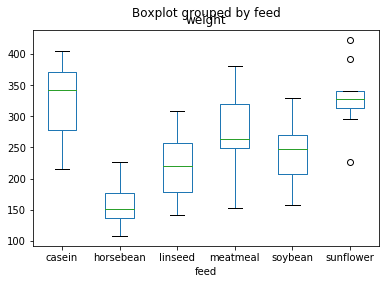

In [12]:
### 상자 그림
boxplot = chickwts.boxplot(column =  'weight', by ='feed', grid=False)

In [13]:
### X와Y의 평균
print(data_x.mean(), data_y.mean())

218.75 276.90909090909093


문제

- chickwts 자료에서 linseed 먹이를 먹은 닭 무게(X)의 분산이 70^2 이고, meatmeal 먹이를 먹은 닭 무게(Y)의 분산이 75^2이라고 알려진 경우에 대한 두 집단의 모평균의 동일성 검정을 하여 보자.

In [14]:
### 두 모집단의 분산이 알려진 경우
# 함수 - 양측 검정
def ztest_2samp(x, y, sigma_x, sigma_y):
    # 영가설하에서의 검정통계량
    t_0 = (x.mean()-y.mean()) / np.sqrt(sigma_x**2/x.size+sigma_y**2/y.size)
    # p-value
    p_single = stats.norm.cdf(t_0)
    p_double = p_single * 2
    return (t_0, p_double)

In [15]:
# 검정 결과 : (검정통계량, p-value)
ztest_2samp(x=data_x, y=data_y, sigma_x = 70, sigma_y=75)

(-1.9177643081438704, 0.05514090335898941)

- 유의수준0.05 하에서 p-value가 유의수준보다 작지 않은므로 영가설을 채택한다. linseed와 meatmeal 먹이를 먹은 두 집단의 무게에 대한 평균이 같다고 할 수 있다.

문제

- linseed 먹이를 먹은 닭 무게의 분산과 meatmeal 먹이를 먹은 닭 무게의 분산을 모르지만, 두 집단의 분산이 같다고 가정할 수 있는 경우에 대한 두 집단의 모평균의 동일성 검정을 하여 보자.

In [16]:
### 두 모집단의 분산이 알려지지 않은 경우
### 두 분산이 같은 경우
stats.ttest_ind(data_x,data_y)

Ttest_indResult(statistic=-2.377260681187378, pvalue=0.02702312877489196)

- 유의수준 0.05 하에서 p-value가유의수준보다작으므로영가설을기각하고, 대립가설을채택한다. linseed 먹이의표본평균(=218.75)이 meatmeal 먹이의표본평균(=276.91)보다작기때문에, linseed 먹이를먹은닭무게의평균보다meatmeal 먹이를먹은닭무게의평균이크다고할수있다

문제

- linseed 먹이를 먹은 닭 무게의 분산과 meatmeal먹이를 먹은 닭 무게의 분산이 같지 않은 경우에 대한 두 집단의 모평균의 동일성 검정을 하여 보자.

In [17]:
### 두 모집단의 분산이 알려지지 않은 경우
### 두 분산이 같지 않은 경우
stats.ttest_ind(data_x,data_y,equal_var = False)

Ttest_indResult(statistic=-2.3542177119900995, pvalue=0.029331439600825963)

- 유의수준 0.05 하에서 p-value가유의수준보다작으므로영가설을기각하고, 대립가설을채택한다. linseed 먹이의표본평균(=218.75)이 meatmeal 먹이의표본평균(=276.91)보다작기때문에, linseed 먹이를먹은닭무게의평균보다meatmeal 먹이를먹은닭무게의평균이크다고할수있다.

▶문제

- 대응표본자료 sleep은 “수면시간증가와관련된 2가지약물의효과에대한자료”이다. sleep 자료는동일 ID에대하여수면시간증감에대한 2번의자료를수집하였다. group 1과 group 2의대응표본(짝진표본)의모평균검정을하여보자

In [18]:
### CSV 파일 있는 자료 읽기
data_file = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sleep.csv"

sleep = pd.read_csv(data_file)
data_x = sleep.loc[sleep.group==1].extra
data_y = sleep.loc[sleep.group==2].extra

In [19]:
sleep

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5
5,6,3.4,1,6
6,7,3.7,1,7
7,8,0.8,1,8
8,9,0.0,1,9
9,10,2.0,1,10


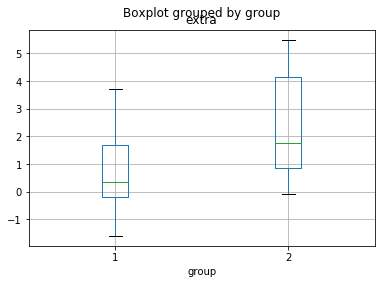

In [20]:
### 상자그림
boxplot =sleep.boxplot(column = 'extra',by="group")

In [21]:
### X 와 Y 의 평균
print(data_x.mean(),data_y.mean())

0.75 2.3299999999999996


In [22]:
### 대응표본(짝진표본)의 모평균 검정
stats.ttest_rel(data_x,data_y)

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.00283289019738427)

- 유의수준 0.05 하에서 p-value가유의수준보다작으므로영가설을기각하고, 대립가설을채택한다. 검정통계량이 0보다작기때문에, group 2에서사용한약물이수면시간을증가시키는효과가크다고할수있다.